# KITTI 360 Dataset Loader
This notebook provides a structured and configurable way to load and preprocess data from the KITTI 360 dataset for use in computer vision model training and evaluation.

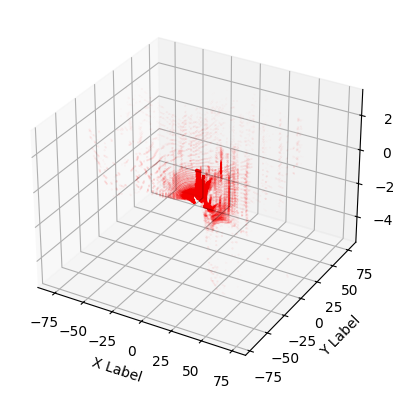

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_velodyne_points(file_path):
    points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)
    return points

data_path = Path('/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000000.bin')
point_cloud = load_velodyne_points(data_path)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c='r', marker='o', s=0.0001)
ax.set_xlabel('X Label')  
ax.set_ylabel('Y Label') 
ax.set_zlabel('Z Label')  
# ax.view_init(elev=90, azim=0)
plt.show()


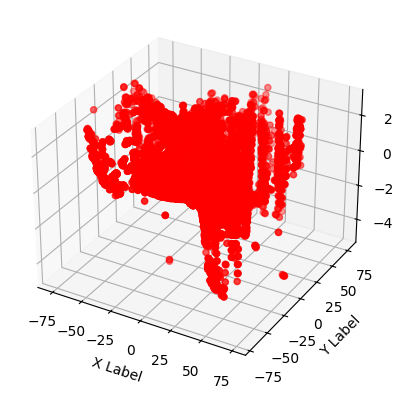

In [11]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_velodyne_points(file_path):
    points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)
    return points

data_path = Path('/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000002.bin')
point_cloud = load_velodyne_points(data_path)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c='r', marker='o')
ax.set_xlabel('X Label')  
ax.set_ylabel('Y Label')  
ax.set_zlabel('Z Label')  
plt.show()


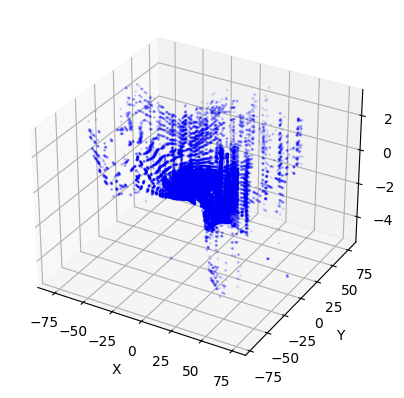

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import xml.etree.ElementTree as ET
from itertools import product, combinations

def load_point_cloud(file_path):
    
    points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)
    return points[:, :3]  # 仅返回 XYZ 坐标

def load_bboxes(xml_file):
   
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        min_point = np.array([float(bbox.find(tag).text) for tag in ['xmin', 'ymin', 'zmin']])
        max_point = np.array([float(bbox.find(tag).text) for tag in ['xmax', 'ymax', 'zmax']])
        bboxes.append((min_point, max_point))
    return bboxes

def plot_point_cloud(points, bboxes):
  
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', s=1, alpha=0.1)

    for min_point, max_point in bboxes:
        for s, e in combinations(np.array(list(product(*zip(min_point, max_point)))), 2):
            if np.sum(np.abs(s-e)) == np.sum(max_point-min_point):
                ax.plot3D(*zip(s, e), color="r")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def main():
    bin_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000000.bin'
    xml_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_bboxes/train/2013_05_28_drive_0000_sync.xml'
    points = load_point_cloud(bin_path)
    bboxes = load_bboxes(xml_path)
    plot_point_cloud(points, bboxes)

if __name__ == '__main__':
    main()


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


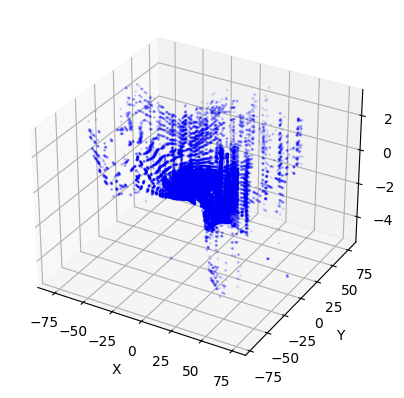

Estimated transformation matrix:
[[ 9.99995143e-01  3.10425336e-03 -2.79812111e-04 -7.34101588e-02]
 [-3.10418701e-03  9.99995154e-01  2.37243784e-04  3.41656519e-02]
 [ 2.80547220e-04 -2.36374042e-04  9.99999933e-01  1.67537666e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transformation Matrix between two point clouds:
[[ 9.99995143e-01  3.10425336e-03 -2.79812111e-04 -7.34101588e-02]
 [-3.10418701e-03  9.99995154e-01  2.37243784e-04  3.41656519e-02]
 [ 2.80547220e-04 -2.36374042e-04  9.99999933e-01  1.67537666e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import xml.etree.ElementTree as ET
from itertools import product, combinations
import open3d as o3d

def load_point_cloud(file_path):
    points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)
    return points[:, :3]  # Return only XYZ coordinates

def load_bboxes(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for 
    
     in root.findall('object'):
        bbox = obj.find('bndbox')
        min_point = np.array([float(bbox.find(tag).text) for tag in ['xmin', 'ymin', 'zmin']])
        max_point = np.array([float(bbox.find(tag).text) for tag in ['xmax', 'ymax', 'zmax']])
        bboxes.append((min_point, max_point))
    return bboxes

def plot_point_cloud(points, bboxes):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', s=1, alpha=0.1)

    for min_point, max_point in bboxes:
        for s, e in combinations(np.array(list(product(*zip(min_point, max_point)))), 2):
            if np.sum(np.abs(s-e)) == np.sum(max_point-min_point):
                ax.plot3D(*zip(s, e), color="r")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def calculate_transformation(bin_file1, bin_file2):
    pcd1 = load_point_cloud(bin_file1)
    pcd2 = load_point_cloud(bin_file2)
    
    pcd1_o3d = o3d.geometry.PointCloud()
    pcd2_o3d = o3d.geometry.PointCloud()
    pcd1_o3d.points = o3d.utility.Vector3dVector(pcd1)
    pcd2_o3d.points = o3d.utility.Vector3dVector(pcd2)

    threshold = 1.0  # 
    trans_init = np.identity(4)  # Initial alignment matrix
    
    reg_p2p = o3d.pipelines.registration.registration_icp(
        pcd1_o3d, pcd2_o3d, threshold, trans_init,
        o3d.pipelines.registration.TransformationEstimationPointToPoint())
    
    print("Estimated transformation matrix:")
    print(reg_p2p.transformation)
    return reg_p2p.transformation

def main():
    bin_path1 = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000000.bin'
    bin_path2 = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000002.bin'
    xml_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_bboxes/train/2013_05_28_drive_0000_sync.xml'
    
    points1 = load_point_cloud(bin_path1)
    bboxes = load_bboxes(xml_path)
    plot_point_cloud(points1, bboxes)
    
    transformation_matrix = calculate_transformation(bin_path1, bin_path2)
    print("Transformation Matrix between two point clouds:")
    print(transformation_matrix)

if __name__ == '__main__':
    main()


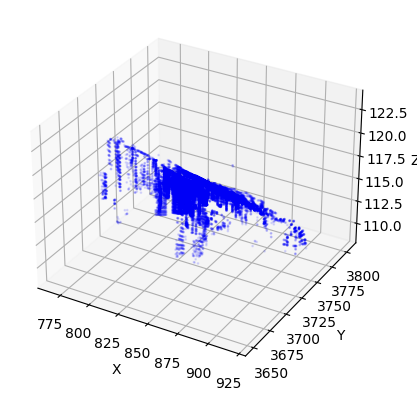

Estimated transformation matrix:
[[ 9.98763996e-01 -4.92980335e-02  6.33905410e-03  1.84044073e+02]
 [ 4.93092771e-02  9.98782228e-01 -1.62973154e-03 -3.67619905e+01]
 [-6.25099202e-03  1.94029136e-03  9.99978580e-01 -1.95279433e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transformation Matrix between two point clouds:
[[ 9.98763996e-01 -4.92980335e-02  6.33905410e-03  1.84044073e+02]
 [ 4.93092771e-02  9.98782228e-01 -1.62973154e-03 -3.67619905e+01]
 [-6.25099202e-03  1.94029136e-03  9.99978580e-01 -1.95279433e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import xml.etree.ElementTree as ET
from itertools import product, combinations
from scipy.spatial.transform import Rotation as R

def load_point_cloud(file_path):
    points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)
    return points[:, :3]  

def load_bboxes(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        min_point = np.array([float(bbox.find(tag).text) for tag in ['xmin', 'ymin', 'zmin']])
        max_point = np.array([float(bbox.find(tag).text) for tag in ['xmax', 'ymax', 'zmax']])
        bboxes.append((min_point, max_point))
    return bboxes

def load_poses(pose_file):
    poses = []
    with open(pose_file, 'r') as f:
        for line in f:
            data = list(map(float, line.split()))
            pose_matrix = np.eye(4)
            pose_matrix[:3, :] = np.array(data[1:]).reshape(3, 4)
            poses.append(pose_matrix)
    return poses

def plot_point_cloud(points, bboxes):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', s=1, alpha=0.1)

    for min_point, max_point in bboxes:
        for s, e in combinations(np.array(list(product(*zip(min_point, max_point)))), 2):
            if np.sum(np.abs(s-e)) == np.sum(max_point-min_point):
                ax.plot3D(*zip(s, e), color="r")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def transform_point_cloud(points, pose):
    homogenous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points = homogenous_points.dot(pose.T)
    return transformed_points[:, :3]

def calculate_transformation(bin_file1, bin_file2, pose1, pose2):
    points1 = load_point_cloud(bin_file1)
    points2 = load_point_cloud(bin_file2)
    
    # Transform point clouds using poses
    transformed_points1 = transform_point_cloud(points1, pose1)
    transformed_points2 = transform_point_cloud(points2, pose2)
    
    # Calculate transformation between the transformed point clouds
    pcd1_o3d = o3d.geometry.PointCloud()
    pcd2_o3d = o3d.geometry.PointCloud()
    pcd1_o3d.points = o3d.utility.Vector3dVector(transformed_points1)
    pcd2_o3d.points = o3d.utility.Vector3dVector(transformed_points2)

    threshold = 1.0 
    trans_init = np.identity(4)  
    
    reg_p2p = o3d.pipelines.registration.registration_icp(
        pcd1_o3d, pcd2_o3d, threshold, trans_init,
        o3d.pipelines.registration.TransformationEstimationPointToPoint())
    
    print("Estimated transformation matrix:")
    print(reg_p2p.transformation)
    return reg_p2p.transformation

def main():
    bin_path1 = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000000.bin'
    bin_path2 = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000001.bin'
    xml_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_bboxes/train/2013_05_28_drive_0000_sync.xml'
    poses_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_poses/2013_05_28_drive_0000_sync/poses.txt'

    points1 = load_point_cloud(bin_path1)
    bboxes = load_bboxes(xml_path)
    poses = load_poses(poses_path)
    
    # Assuming the first two poses correspond to the first two point clouds
    pose1 = poses[0]
    pose2 = poses[1]

    # Transform points1 using pose1
    transformed_points1 = transform_point_cloud(points1, pose1)
    plot_point_cloud(transformed_points1, bboxes)
    
    transformation_matrix = calculate_transformation(bin_path1, bin_path2, pose1, pose2)
    print("Transformation Matrix between two point clouds:")
    print(transformation_matrix)

if __name__ == '__main__':
    main()


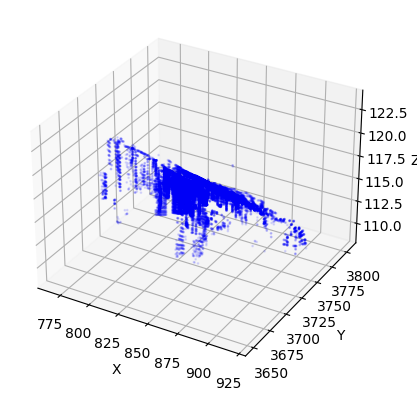

Estimated transformation matrix:
[[ 9.98763996e-01 -4.92980335e-02  6.33905410e-03  1.84044073e+02]
 [ 4.93092771e-02  9.98782228e-01 -1.62973154e-03 -3.67619905e+01]
 [-6.25099202e-03  1.94029136e-03  9.99978580e-01 -1.95279433e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transformation Matrix between two point clouds:
[[ 9.98763996e-01 -4.92980335e-02  6.33905410e-03  1.84044073e+02]
 [ 4.93092771e-02  9.98782228e-01 -1.62973154e-03 -3.67619905e+01]
 [-6.25099202e-03  1.94029136e-03  9.99978580e-01 -1.95279433e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


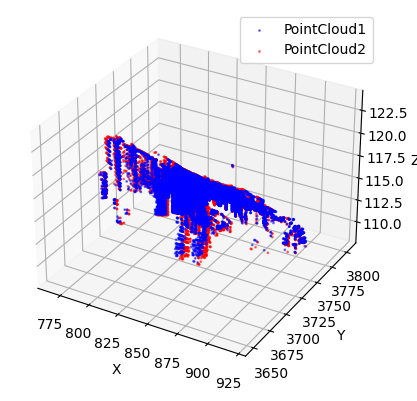

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import xml.etree.ElementTree as ET
from scipy.spatial.transform import Rotation as R
import open3d as o3d

def load_point_cloud(file_path):
    points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)
    return points[:, :3]  

def load_bboxes(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        min_point = np.array([float(bbox.find(tag).text) for tag in ['xmin', 'ymin', 'zmin']])
        max_point = np.array([float(bbox.find(tag).text) for tag in ['xmax', 'ymax', 'zmax']])
        bboxes.append((min_point, max_point))
    return bboxes

def load_poses(pose_file):
    poses = []
    with open(pose_file, 'r') as f:
        for line in f:
            data = list(map(float, line.split()))
            pose_matrix = np.eye(4)
            pose_matrix[:3, :] = np.array(data[1:]).reshape(3, 4)
            poses.append(pose_matrix)
    return poses

def plot_point_cloud(points, bboxes, color='b'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=color, marker='o', s=1, alpha=0.1)

    for min_point, max_point in bboxes:
        for s, e in combinations(np.array(list(product(*zip(min_point, max_point)))), 2):
            if np.sum(np.abs(s-e)) == np.sum(max_point-min_point):
                ax.plot3D(*zip(s, e), color="r")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def transform_point_cloud(points, pose):
    homogenous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points = homogenous_points.dot(pose.T)
    return transformed_points[:, :3]

def calculate_transformation(bin_file1, bin_file2, pose1, pose2):
    points1 = load_point_cloud(bin_file1)
    points2 = load_point_cloud(bin_file2)
    
    # Transform point clouds using poses
    transformed_points1 = transform_point_cloud(points1, pose1)
    transformed_points2 = transform_point_cloud(points2, pose2)
    
    # Calculate transformation between the transformed point clouds
    pcd1_o3d = o3d.geometry.PointCloud()
    pcd2_o3d = o3d.geometry.PointCloud()
    pcd1_o3d.points = o3d.utility.Vector3dVector(transformed_points1)
    pcd2_o3d.points = o3d.utility.Vector3dVector(transformed_points2)

    threshold = 1.0  
    trans_init = np.identity(4) 
    
    reg_p2p = o3d.pipelines.registration.registration_icp(
        pcd1_o3d, pcd2_o3d, threshold, trans_init,
        o3d.pipelines.registration.TransformationEstimationPointToPoint())
    
    print("Estimated transformation matrix:")
    print(reg_p2p.transformation)
    return reg_p2p.transformation, transformed_points1, transformed_points2

def main():
    bin_path1 = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000000.bin'
    bin_path2 = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000001.bin'
    xml_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_bboxes/train/2013_05_28_drive_0000_sync.xml'
    poses_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_poses/2013_05_28_drive_0000_sync/poses.txt'

    points1 = load_point_cloud(bin_path1)
    bboxes = load_bboxes(xml_path)
    poses = load_poses(poses_path)
    
    # Assuming the first two poses correspond to the first two point clouds
    pose1 = poses[0]
    pose2 = poses[1]

    # Transform points1 using pose1
    transformed_points1 = transform_point_cloud(points1, pose1)
    plot_point_cloud(transformed_points1, bboxes)
    
    transformation_matrix, transformed_points1, transformed_points2 = calculate_transformation(bin_path1, bin_path2, pose1, pose2)
    print("Transformation Matrix between two point clouds:")
    print(transformation_matrix)
    
    # Visualize both point clouds together
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(transformed_points1[:, 0], transformed_points1[:, 1], transformed_points1[:, 2], c='b', marker='o', s=1, alpha=0.5, label='PointCloud1')
    ax.scatter(transformed_points2[:, 0], transformed_points2[:, 1], transformed_points2[:, 2], c='r', marker='o', s=1, alpha=0.5, label='PointCloud2')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()


Loaded calibration data: {'image_00': array([ 0.03717833, -0.09861821,  0.9944306 ,  1.5752681 ,  0.99926756,
       -0.00535534, -0.03789026,  0.00439141,  0.00906218,  0.99511093,
        0.09834688, -0.65      ]), 'image_01': array([ 0.01940009, -0.10515296,  0.99426681,  1.59772414,  0.9997375 ,
       -0.01008367, -0.02057327,  0.59814949,  0.01218919,  0.99440493,
        0.10492974, -0.64884331]), 'image_02': array([ 0.99951851,  0.00412766, -0.03075245,  0.72640369, -0.03079267,
        0.01006084, -0.99947516, -0.14996585, -0.0038161 ,  0.99994087,
        0.0101831 , -1.06864001]), 'image_03': array([-9.99682170e-01,  5.70340700e-04, -2.52038325e-02,  7.01684213e-01,
       -2.52033830e-02,  7.82081400e-04,  9.99682038e-01,  7.46365095e-01,
        5.89870900e-04,  9.99999531e-01, -7.67458300e-04, -1.07519783e+00])}


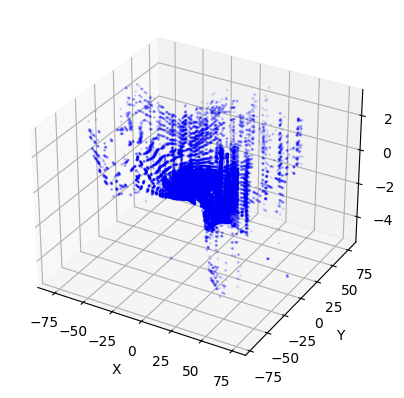

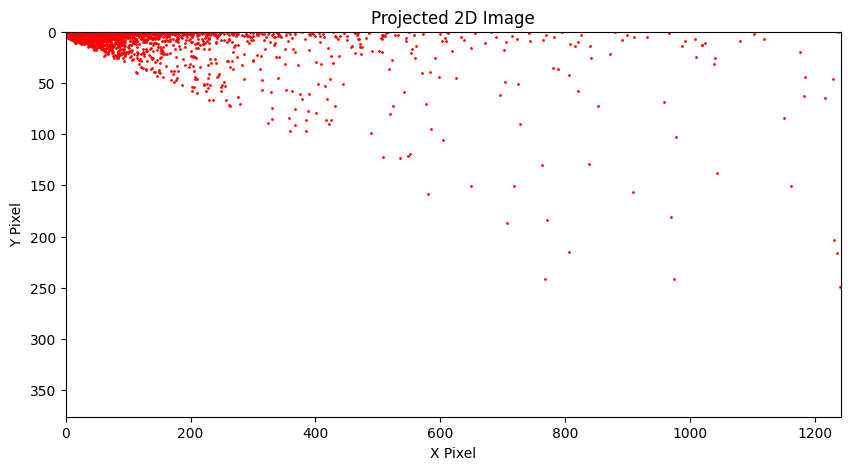

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import xml.etree.ElementTree as ET
from itertools import product, combinations

def load_point_cloud(file_path):
    points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)
    return points[:, :3]  

def load_bboxes(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        min_point = np.array([float(bbox.find(tag).text) for tag in ['xmin', 'ymin', 'zmin']])
        max_point = np.array([float(bbox.find(tag).text) for tag in ['xmax', 'ymax', 'zmax']])
        bboxes.append((min_point, max_point))
    return bboxes

def load_poses(pose_file):
    poses = []
    with open(pose_file, 'r') as f:
        for line in f:
            data = list(map(float, line.split()))
            pose_matrix = np.eye(4)
            pose_matrix[:3, :] = np.array(data[1:]).reshape(3, 4)
            poses.append(pose_matrix)
    return poses

def load_calibration(calib_file):
    calibs = {}
    with open(calib_file, 'r') as f:
        for line in f:
            key, *values = line.split()
            calibs[key[:-1]] = np.array(list(map(float, values)))
    return calibs

def plot_point_cloud(points, bboxes, color='b'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=color, marker='o', s=1, alpha=0.1)

    for min_point, max_point in bboxes:
        for s, e in combinations(np.array(list(product(*zip(min_point, max_point)))), 2):
            if np.sum(np.abs(s-e)) == np.sum(max_point-min_point):
                ax.plot3D(*zip(s, e), color="r")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def transform_point_cloud(points, pose):
    homogenous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points = homogenous_points.dot(pose.T)
    return transformed_points[:, :3]

def project_to_image(points, calibration_data):
    R = calibration_data['R']
    T = calibration_data['T']
    P = calibration_data['P']

    
    points_cam = (R @ points.T + T[:, None]).T

    
    points_img = P @ np.vstack((points_cam.T, np.ones((1, points_cam.shape[0]))))

   
    points_img = points_img[:2, :] / points_img[2, :]
    return points_img

def plot_image_projection(points_img, image_size):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_img[0, :], points_img[1, :], c='r', s=1)
    plt.xlim(0, image_size[1])
    plt.ylim(image_size[0], 0)
    plt.xlabel('X Pixel')
    plt.ylabel('Y Pixel')
    plt.title('Projected 2D Image')
    plt.show()

def main():
    bin_path1 = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_raw/2013_05_28_drive_0000_sync/velodyne_points/data/0000000000.bin'
    xml_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_3d_bboxes/train/2013_05_28_drive_0000_sync.xml'
    poses_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/data_poses/2013_05_28_drive_0000_sync/poses.txt'
    calib_path = '/storage/group/dataset_mirrors/01_incoming/kitti_360/KITTI-360/calibration/calib_cam_to_pose.txt'

    points1 = load_point_cloud(bin_path1)
    bboxes = load_bboxes(xml_path)
    poses = load_poses(poses_path)
    calibs = load_calibration(calib_path)

    print("Loaded calibration data:", calibs)
    plot_point_cloud(points1, bboxes)

    
    calibration_data = {
        'R': calibs['image_00'][:9].reshape(3, 3),
        'T': calibs['image_00'][9:12],
        'P': np.hstack((calibs['image_00'][:3].reshape(3, 1), np.eye(3)))
    }

   
    points_img = project_to_image(points1, calibration_data)
    plot_image_projection(points_img, (376, 1241))  

if __name__ == '__main__':
    main()
